<a href="https://colab.research.google.com/github/JulianaAiolfi/Bootecamp_Alura/blob/main/Modulo_01/notebooks/Aula_05_Modulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula_05 Manipulação e interpretação de gráficos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import cm
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/JulianaAiolfi/Bootecamp_Alura/main/Modulo_01/dados/SUS_atendimento_valor_anomes_unidfederacao.csv',
                    encoding='ISO-8859-1',skiprows=3, sep=';', skipfooter=12,
                    thousands='.', decimal=',')

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')


In [6]:
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index('Unidade da Federação')

In [7]:
usaveis.sort_values('Total', ascending=False)

#Desta forma conseguimos visualizar pela ondem de gastos

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1045985541.65,173028872.08,170599768.26,170372620.91,172496515.55,175536067.95,179595753.32,180066614.07,180191624.09,191952879.56,191147800.54,177095026.47,192464139.30,178667128.01,217037967.95,215172250.06,212913831.90,212732684.55,214101294.62,215296177.02,214315721.06,216151997.07,209300675.07,192174266.58,213538636.98,195787926.41,239461689.59,221220158.69,232002291.65,224107258.60,224209416.55,249178076.83,224160204.76,239579739.06,225727064.81,...,291781565.55,279195949.73,286287768.42,295788920.41,277746750.96,303434114.02,278337466.38,267033219.94,292320806.36,268308286.06,287951470.28,293008931.66,309226664.18,281719752.25,307424752.02,304130045.38,294270442.26,304092593.55,282933109.77,273632328.98,304490198.22,272226855.85,278135553.54,255312907.38,314426891.60,328488459.97,362299318.36,350944934.44,339730678.54,329566715.24,328324290.21,338408091.35,360476779.25,351919582.57,499511647.81,491137639.41,500497868.07,397170231.42,164662041.50,43433962300.53
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206419371.63,70301089.50,79119005.51,79046322.41,79268070.12,79625252.76,82214376.16,80374117.08,82414298.48,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100265014.78,91831325.37,97289703.07,95723396.53,100050008.70,98993031.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105499719.49,99666115.96,103377763.26,107844259.69,104341138.19,100525403.88,101943625.50,...,153607663.82,150267668.31,156801638.15,160547705.63,146085878.12,157301591.66,148172783.99,145457662.74,153275223.01,142711788.70,151996335.31,157959772.67,163686441.56,154206069.21,166814028.07,161871399.23,157458850.12,166192204.92,152183389.15,152495864.34,158292850.48,141468529.60,147770137.30,127472375.51,142759145.92,157355166.64,177502706.50,182246784.56,181792488.62,176147578.32,173199020.55,181850052.28,194280257.00,185287432.33,261413415.64,247909897.61,239439934.64,178069022.08,78465417.06,21472877412.32
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,127088405.60,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127465820.78,132614796.58,124865873.14,134745739.06,127174381.95,126210733.35,133870601.68,126221140.81,113573832.72,122331688.11,116125740.39,114786294.43,97841923.89,111036335.00,115222144.70,123884692.23,125120192.29,121854655.30,127889029.84,135272512.58,129202433.45,130059439.01,133796115.75,170908050.63,163768430.77,152905711.34,112190739.32,45253506.54,15366468888.79
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,510646

In [8]:
ordenado_por_total = usaveis.sort_values('Total', ascending=False) #criando uma nova variavel
ordenado_por_total = ordenado_por_total.drop('Total', axis=1) #deletando as coluna total, para ficar somente com a ordem dos gastos que mais gastaram
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1045985541.65,173028872.08,170599768.26,170372620.91,172496515.55,175536067.95,179595753.32,180066614.07,180191624.09,191952879.56,191147800.54,177095026.47,192464139.30,178667128.01,217037967.95,215172250.06,212913831.90,212732684.55,214101294.62,215296177.02,214315721.06,216151997.07,209300675.07,192174266.58,213538636.98,195787926.41,239461689.59,221220158.69,232002291.65,224107258.60,224209416.55,249178076.83,224160204.76,239579739.06,225727064.81,...,286467529.65,291781565.55,279195949.73,286287768.42,295788920.41,277746750.96,303434114.02,278337466.38,267033219.94,292320806.36,268308286.06,287951470.28,293008931.66,309226664.18,281719752.25,307424752.02,304130045.38,294270442.26,304092593.55,282933109.77,273632328.98,304490198.22,272226855.85,278135553.54,255312907.38,314426891.60,328488459.97,362299318.36,350944934.44,339730678.54,329566715.24,328324290.21,338408091.35,360476779.25,351919582.57,499511647.81,491137639.41,500497868.07,397170231.42,164662041.50
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206419371.63,70301089.50,79119005.51,79046322.41,79268070.12,79625252.76,82214376.16,80374117.08,82414298.48,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100265014.78,91831325.37,97289703.07,95723396.53,100050008.70,98993031.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105499719.49,99666115.96,103377763.26,107844259.69,104341138.19,100525403.88,101943625.50,...,150711186.69,153607663.82,150267668.31,156801638.15,160547705.63,146085878.12,157301591.66,148172783.99,145457662.74,153275223.01,142711788.70,151996335.31,157959772.67,163686441.56,154206069.21,166814028.07,161871399.23,157458850.12,166192204.92,152183389.15,152495864.34,158292850.48,141468529.60,147770137.30,127472375.51,142759145.92,157355166.64,177502706.50,182246784.56,181792488.62,176147578.32,173199020.55,181850052.28,194280257.00,185287432.33,261413415.64,247909897.61,239439934.64,178069022.08,78465417.06
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,124731345.17,127088405.60,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127465820.78,132614796.58,124865873.14,134745739.06,127174381.95,126210733.35,133870601.68,126221140.81,113573832.72,122331688.11,116125740.39,114786294.43,97841923.89,111036335.00,115222144.70,123884692.23,125120192.29,121854655.30,127889029.84,135272512.58,129202433.45,130059439.01,133796115.75,170908050.63,163768430.77,152905711.34,112190739.32,45253506.54
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.

In [9]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

#Retirando as 6 primeiras colunas Fev/2008 a Jan/2008

In [22]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2021/Jul'

In [23]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           164.66
31 Minas Gerais         78.47
41 Paraná               45.25
43 Rio Grande do Sul    30.83
33 Rio de Janeiro       44.39
Name: 2021/Jul, dtype: float64

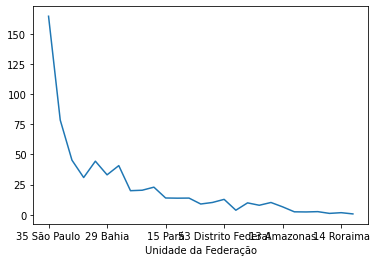

In [24]:
gastos_do_mais_recente.plot()

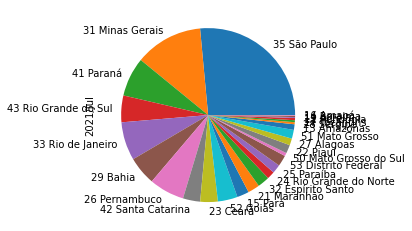

In [25]:
gastos_do_mais_recente.plot(kind='pie')


Horrores da pizza atual:

*   legenda está horrível
*   número de fatias inacreditável

Já estamos com uma vantagem:

*   o gráfico veio ordenado




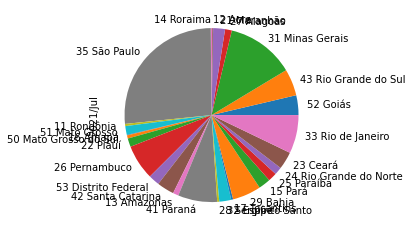

In [26]:
gastos_do_mais_recente.sample(frac=1).plot(kind='pie')

Horrores da pizza atual:

*   legenda está horrível
*   número de fatias inacreditável
*   não dá para saber a ordem
*   muito ruim para definir ordem
*   péssimo para COMPARAR











In [27]:
# visualização simples pra valor absoluto

gastos_do_mais_recente

Unidade da Federação
35 São Paulo             164.66
31 Minas Gerais           78.47
41 Paraná                 45.25
43 Rio Grande do Sul      30.83
33 Rio de Janeiro         44.39
29 Bahia                  33.07
26 Pernambuco             40.71
42 Santa Catarina         19.91
23 Ceará                  20.29
52 Goiás                  22.83
15 Pará                   13.85
21 Maranhão               13.70
32 Espírito Santo         13.77
24 Rio Grande do Norte     8.85
25 Paraíba                10.13
53 Distrito Federal       12.71
50 Mato Grosso do Sul      3.70
22 Piauí                   9.80
27 Alagoas                 7.81
51 Mato Grosso            10.11
13 Amazonas                6.48
28 Sergipe                 2.37
17 Tocantins               2.27
11 Rondônia                2.52
12 Acre                    1.07
14 Roraima                 1.66
16 Amapá                   0.63
Name: 2021/Jul, dtype: float64

In [28]:
gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo             3.71
31 Minas Gerais          1.77
41 Paraná                1.02
43 Rio Grande do Sul     0.69
33 Rio de Janeiro        1.00
29 Bahia                 0.74
26 Pernambuco            0.92
42 Santa Catarina        0.45
23 Ceará                 0.46
52 Goiás                 0.51
15 Pará                  0.31
21 Maranhão              0.31
32 Espírito Santo        0.31
24 Rio Grande do Norte   0.20
25 Paraíba               0.23
53 Distrito Federal      0.29
50 Mato Grosso do Sul    0.08
22 Piauí                 0.22
27 Alagoas               0.18
51 Mato Grosso           0.23
13 Amazonas              0.15
28 Sergipe               0.05
17 Tocantins             0.05
11 Rondônia              0.06
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.01
Name: 2021/Jul, dtype: float64

In [29]:
(gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]).head(5)

Unidade da Federação
35 São Paulo           3.71
31 Minas Gerais        1.77
41 Paraná              1.02
43 Rio Grande do Sul   0.69
33 Rio de Janeiro      1.00
Name: 2021/Jul, dtype: float64

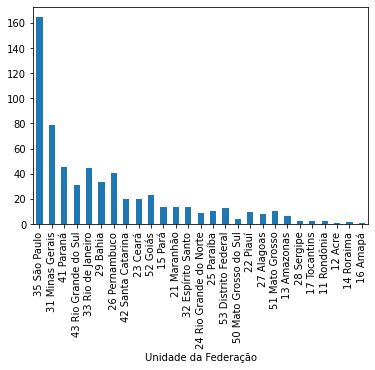

In [30]:
gastos_do_mais_recente.plot(kind='bar')

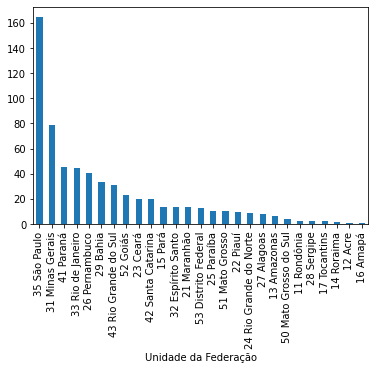

In [31]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar')

##Desafios

##Desafio_01 - Criar a tabela de comparação com o seu estado (ou estado de preferência)

In [33]:
top_5 = list(ordenado_por_total.head(5).index) #5 estados com maior custo total relacionado a internação pelo SUS
top_5_mais_alagoas = top_5 + ['27 Alagoas']
top_5_mais_alagoas

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro',
 '27 Alagoas']

In [35]:
(gastos_do_mais_recente / gastos_do_mais_recente.loc['27 Alagoas']).loc[top_5_mais_alagoas]

Unidade da Federação
35 São Paulo           21.07
31 Minas Gerais        10.04
41 Paraná               5.79
43 Rio Grande do Sul    3.95
33 Rio de Janeiro       5.68
27 Alagoas              1.00
Name: 2021/Jul, dtype: float64

##Desafio_02 - Documentação do matplotlib e pandas para colocar grid no gráfico

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas-dataframe-plot

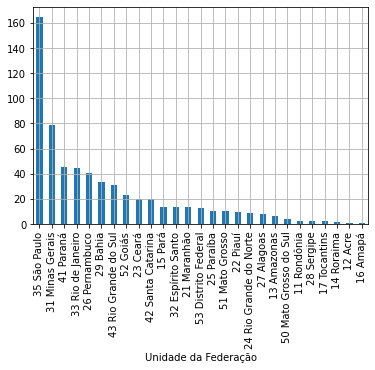

In [36]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar', grid=True)

Descrição gráfico
- Título: Sem título
- Base de dados utilizada: Variável gastos_do_mais_recente
- Tipo de gráfico: Barra
- Eixo X: Estados
- Eixo Y: Valores
- O que está sendo mostrado: Foi adicionado ao gráfico o recurso grid, ou grades, que facilitam a medição dos valores mostrados. 

##Desafio_03 - gráfico de barra do gasto dos outros estados em função ao seu estado

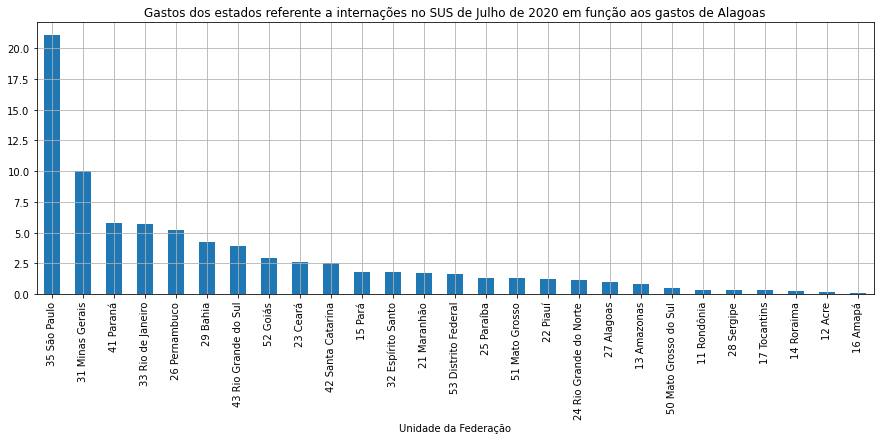

In [39]:
gastos_recente_em_funcao_ao_al = (gastos_do_mais_recente / gastos_do_mais_recente.loc['27 Alagoas'])
ax = gastos_recente_em_funcao_ao_al.sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(15,5))
ax.set_title("Gastos dos estados referente a internações no SUS de Julho de 2020 em função aos gastos de Alagoas")
plt.show()

Descrição gráfico
- Título: Gastos dos estados referente a internações no SUS de Julho de 2020 em função aos gastos do Distrito Federal
- Base de dados utilizada: Variável gastos_recente_em_funcao_ao_df
- Tipo de gráfico: Barra
- Eixo X: Estados
- Eixo Y: Valores em função do Distrito Federal
- O que está sendo mostrado: Neste gráfico é mostrado a proporção de diferença entre os gastos dos Estados em função do Distrito Federal. São Paulo possuí 13 vezes o valor de gastos do Distrito Federal.

##Desafio_04 - Gasto por população de dois estados. escolha dois estados. gráfico de barras

https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [40]:
dict_estado_populacao = {'35 São Paulo':	46289333,	
'31 Minas Gerais':	21331292,
'33 Rio de Janeiro':	17366189,
'29 Bahia':	14930634,
'41 Paraná':	11516840,
'43 Rio Grande do Sul':	11422973,
'26 Pernambuco':	9616621,
'23 Ceará':	9187103,
'15 Pará':	8690745,
'42 Santa Catarina':	7279638,
'52 Goiás':	7142070,
'21 Maranhão':	7127460,
'13 Amazonas':	4228381,
'32 Espírito Santo':	4064052,
'25 Paraíba':	4039277,
'24 Rio Grande do Norte':	3534165,
'51 Mato Grosso':	3526220,
'27 Alagoas':	3351543,
'22 Piauí':	3281480,
'53 Distrito Federal':	3055149,
'50 Mato Grosso do Sul':	2809394,
'28 Sergipe':	2318822,
'11 Rondônia':	1796460,
'17 Tocantins':	1590248,
'12 Acre':	894470,
'16 Amapá':	861773,
'14 Roraima':	631181}

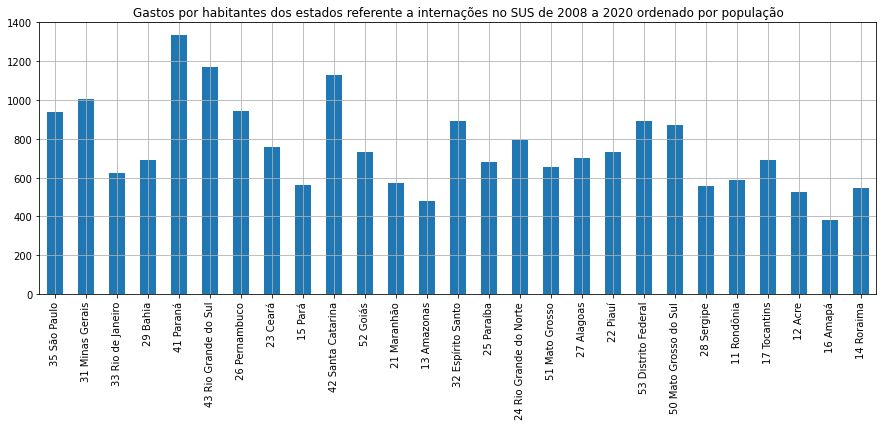

In [41]:
gasto_por_hab_por_estado = [[usaveis["Total"].loc[estado] / dict_estado_populacao[estado], dict_estado_populacao[estado]] for estado in dict_estado_populacao.keys()]
df_gasto_por_hab = pd.DataFrame(data=gasto_por_hab_por_estado, index=dict_estado_populacao.keys(), columns=['Gasto por habitante', 'Num de Habitantes'])
df_gasto_por_hab.sort_values(by='Num de Habitantes', ascending=False)['Gasto por habitante'].plot(kind='bar', grid=True, figsize=(15,5))
plt.title("Gastos por habitantes dos estados referente a internações no SUS de 2008 a 2020 ordenado por população")
plt.show()


Descrição gráfico
- Título: Gastos por habitantes dos estados referente a internações no SUS de 2008 a 2020 ordenado por população
- Base de dados utilizada: Variável df_gasto_por_hab
- Tipo de gráfico: Barra
- Eixo X: Estados
- Eixo Y: Gasto por habitante
- O que está sendo mostrado: Neste gráfico é mostrado o gasto por habitante referente a cada Estado no período entre 2008 e 2020.

In [42]:
def custo_hab(populacao_A, estado_A, populacao_B, estado_B): # Função para fazer cálculo por habitante comparando entre dois estados.
  gasto_A = usaveis["Total"].loc[estado_A] / populacao_A
  gasto_B = usaveis["Total"].loc[estado_B] / populacao_B
  df_gasto_por_hab = pd.DataFrame(data=[gasto_A, gasto_B], index=[estado_A, estado_B], columns=['Gasto por habitante'])
  df_gasto_por_hab.plot(kind='bar', grid=True, figsize=(15,5))

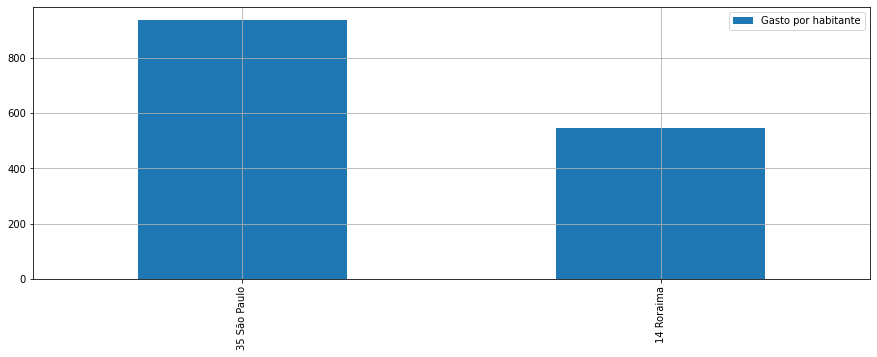

In [43]:
custo_hab(46289333, '35 São Paulo', 631181, '14 Roraima')


Descrição gráfico
- Título: Sem título
- Base de dados utilizada: Variável df_gasto_por_hab
- Tipo de gráfico: Barra
- Eixo X: Estados
- Eixo Y: Gasto por habitante
- O que está sendo mostrado: Neste gráfico é mostrado um comparativo direto entre os Estados de São Paulo e Roraima. Em São Paulo podemos observar os gastos em torno de 890 reais e em Roraima em torno de 580 reais.